In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading Dataset
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Features for Clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

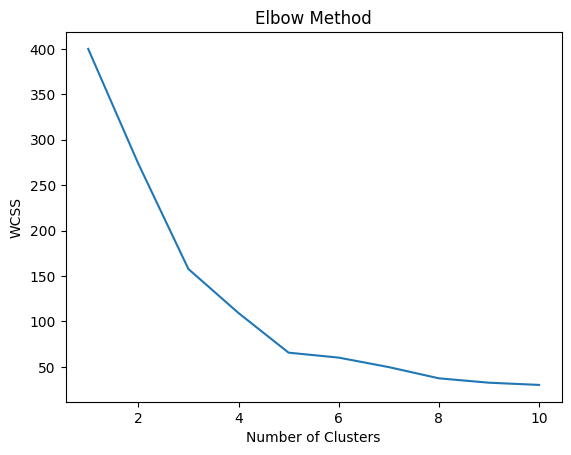

In [ ]:
#Visual Exploration of Grouping
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
#Implementing K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

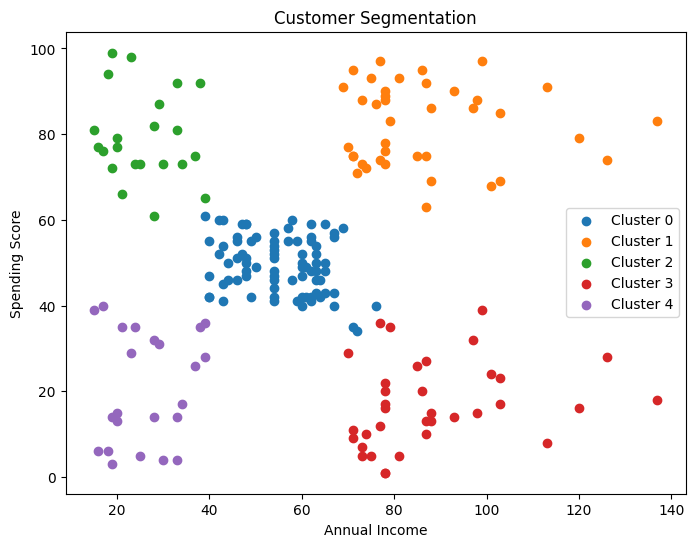

In [ ]:
#Visualization
plt.figure(figsize=(8,6))
for i in range(5):
    plt.scatter(
        X.iloc[clusters == i, 0],
        X.iloc[clusters == i, 1],
        label=f"Cluster {i}"
    )
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.legend()
plt.show()


In [ ]:
#Interpretation of Clusters
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


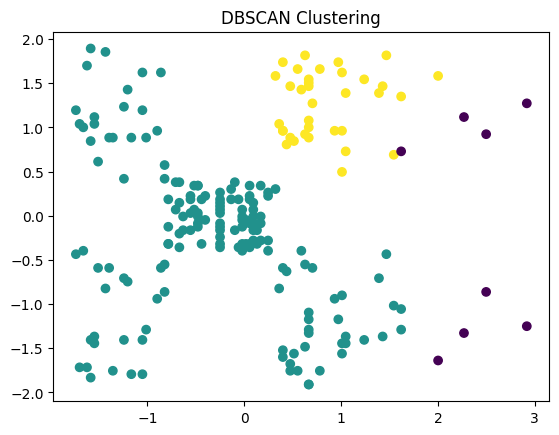

In [ ]:
#Implementing DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = db_clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=db_clusters)
plt.title("DBSCAN Clustering")
plt.show()

K-Means Clusters: 5
DBSCAN Clusters: 2
DBSCAN Outliers: 8
K-Means Silhouette: 0.5546571631111091
DBSCAN Silhouette: 0.3875583892728279

K-Means Summary
                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043

DBSCAN Summary
                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
0                        52.490446               43.101911
1                        82.542857               82.800000


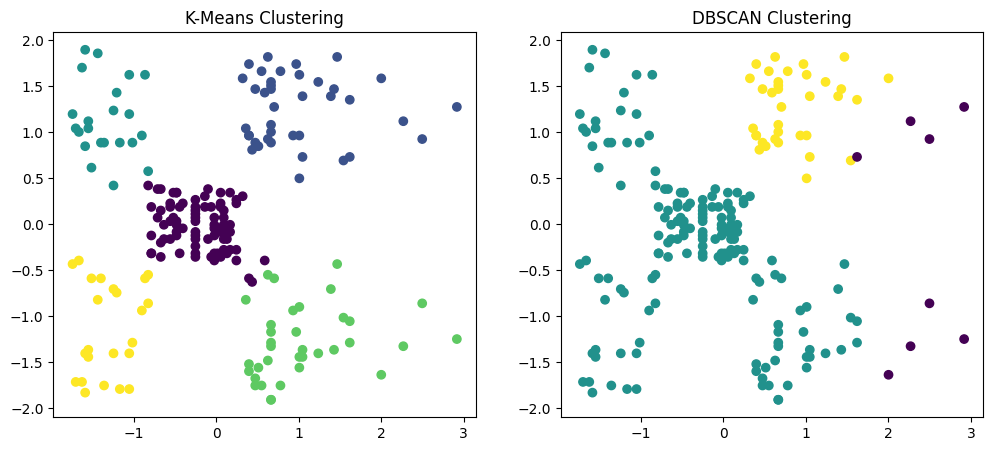

In [ ]:
#Comparison of both Models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv("Mall_Customers.csv")

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

kmeans_clusters = len(set(kmeans_labels))
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

outliers = list(dbscan_labels).count(-1)

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(X_scaled[dbscan_mask], dbscan_labels[dbscan_mask])

data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

print("K-Means Clusters:", kmeans_clusters)
print("DBSCAN Clusters:", dbscan_clusters)
print("DBSCAN Outliers:", outliers)
print("K-Means Silhouette:", kmeans_silhouette)
print("DBSCAN Silhouette:", dbscan_silhouette)

print("\nK-Means Summary")
print(data.groupby('KMeans_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

print("\nDBSCAN Summary")
print(data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels)
plt.title("K-Means Clustering")

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=dbscan_labels)
plt.title("DBSCAN Clustering")

plt.show()